# Data understanding
This notebook is made to explore the structure in the data and the relations beyween the variables and understand the context captured in this files.
The goal of this first notebook is to formulate relevant questions to make insights about Github developer survey data and propose some interesting questions based on the questions made.

## Data
The data chosed for this analysis is the AirBnB data for housing prices in the Boston city.
The dataset can be found on [this link](https://www.kaggle.com/airbnb/boston)

In [2]:
! ls data/

survey_results_public.csv  survey_results_schema.csv


In [3]:
# import libraries
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
data_dir = Path('data')
survey_df = pd.read_csv(str(data_dir / 'survey_results_public.csv'))
schema_df = pd.read_csv(str(data_dir / 'survey_results_schema.csv'))

## Structure of the data

### Survey

Contains information about developers using github and the answers to a list of questions made in the survey.

In [5]:
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


### Schema
This dataset is a data dictionary containing the descriptions of the columns in `survey_df` dataset.

In [7]:
schema_df.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


## Data Exploration

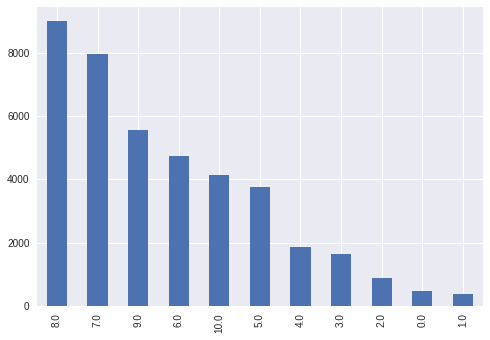

In [13]:
survey_df["JobSatisfaction"].value_counts().plot.bar();

In general we can see there is a good rate of job satisfaction among developers, lets see what makes a developer feel fulfilled in his job.

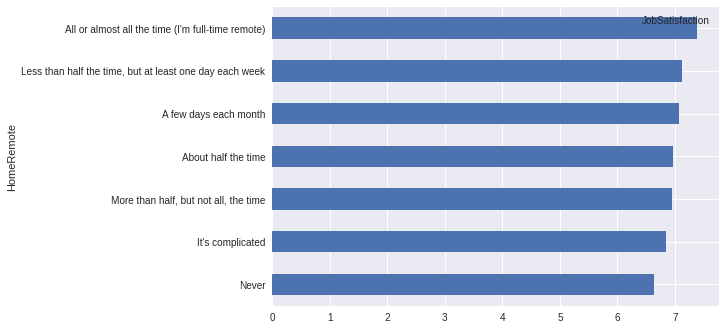

In [23]:
job_sat = survey_df[["HomeRemote","JobSatisfaction"]].groupby("HomeRemote").mean()
job_sat = job_sat.sort_values("JobSatisfaction")
job_sat.plot.barh();

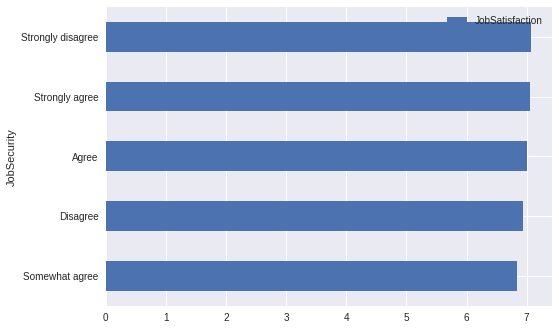

In [28]:
job_sec = survey_df[["JobSecurity", "JobSatisfaction"]].groupby("JobSecurity").mean()
job_sec = job_sec.sort_values("JobSatisfaction")
job_sec.plot.barh();

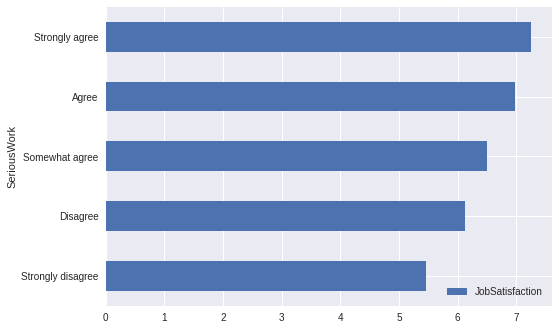

In [30]:
job_sec = survey_df[["SeriousWork", "JobSatisfaction"]].groupby("SeriousWork").mean()
job_sec = job_sec.sort_values("JobSatisfaction")
job_sec.plot.barh();

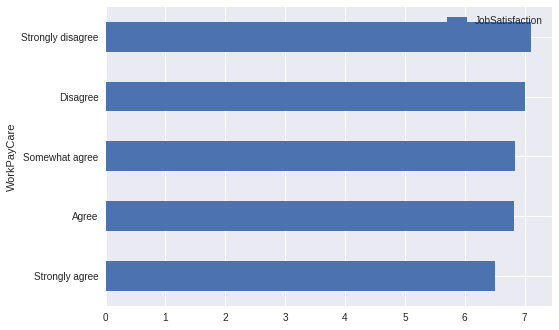

In [31]:
comp_var = "WorkPayCare"
tmp = survey_df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("JobSatisfaction")
tmp.plot.barh();

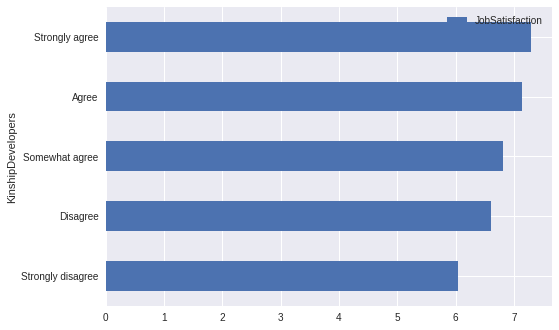

In [32]:
comp_var = "KinshipDevelopers"
tmp = survey_df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("JobSatisfaction")
tmp.plot.barh();

1.0     5901
0.0     5129
2.0     2933
3.0     1233
4.0     1096
5.0      958
10.0     559
40.0     476
6.0      427
8.0      325
7.0      266
20.0     259
15.0     134
12.0     126
9.0       93
14.0      77
11.0      58
30.0      55
35.0      46
19.0      45
16.0      41
13.0      37
25.0      34
21.0      34
24.0      33
18.0      30
17.0      25
22.0      22
39.0      18
38.0      16
37.0      16
36.0      15
26.0      14
27.0      12
32.0      11
23.0      11
28.0      10
34.0       9
29.0       7
31.0       5
33.0       4
Name: HoursPerWeek, dtype: int64


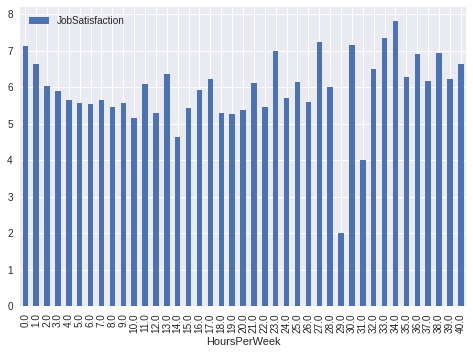

In [39]:
comp_var = "HoursPerWeek"
print(survey_df[comp_var].value_counts())
tmp = survey_df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("HoursPerWeek")
tmp.plot.bar();

In [50]:
from collections import defaultdict

comp_var = "ImportantBenefits"
benefits_count = defaultdict(int)
for value in survey_df["ImportantBenefits"]:
    if type(value) == str:
        for benefit in value.split(';'):
            benefits_count[benefit.strip()] += 1

In [59]:
benefits_df = pd.DataFrame(list(benefits_count.items()), columns=["benefit", "frec"])
benefits_df.set_index("benefit", inplace=True)

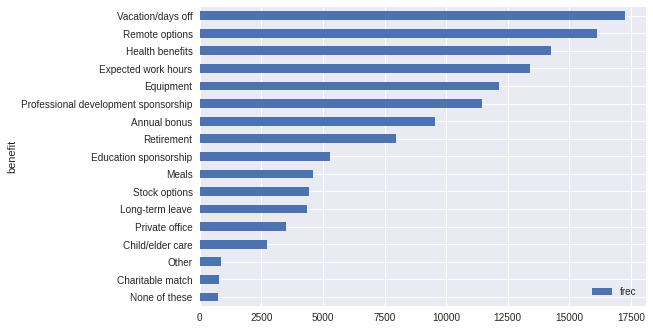

In [63]:
benefits_df.sort_values('frec').plot.barh();

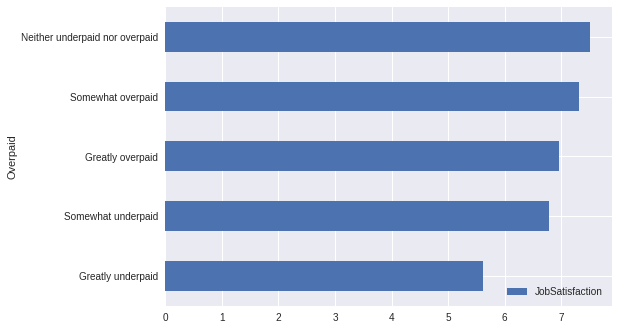

In [66]:
comp_var = "Overpaid"
tmp = survey_df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("JobSatisfaction")
tmp.plot.barh();

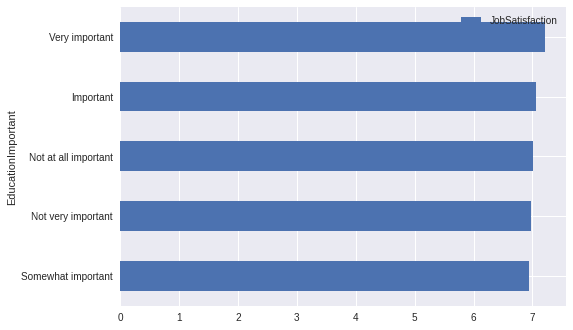

In [67]:
comp_var = "EducationImportant"
tmp = survey_df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("JobSatisfaction")
tmp.plot.barh();

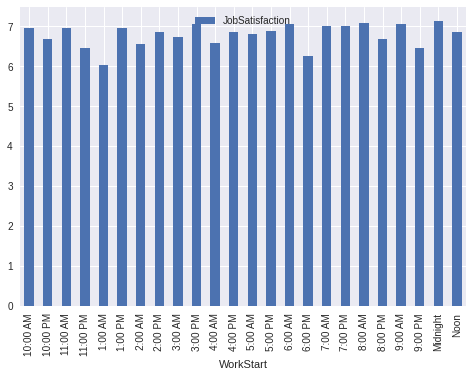

In [69]:
comp_var = "WorkStart"
tmp = survey_df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("WorkStart")
tmp.plot.bar();

In [70]:
survey_df["StackOverflowDescribes"].value_counts()

I have a login for Stack Overflow, but haven't created a CV or Developer Story    19696
I have created a CV or Developer Story on Stack Overflow                           8906
I've visited Stack Overflow, but haven't logged in/created an account              8012
I'd never heard of Stack Overflow before today                                      196
I've heard of Stack Overflow, but have never visited                                122
Name: StackOverflowDescribes, dtype: int64

In [71]:
survey_df["Gender"].value_counts()

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Transgender; Gender non-conforming                            15
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Female                                                  15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Transgender; Gender